In [33]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [34]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
#generating a simple linear regression dataset using make_regression from sklearn.datasets. 
#The X_numpy will contain the input features, and y_numpy will contain the corresponding target values.

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y)
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
print (X)



tensor([-126.2492,   50.9288,   63.1546,    6.0547,   -5.7295,   -2.7519,
          58.7036,   53.8136,  -95.3411,   24.6481,  -59.4170,  -73.4235,
        -104.1627,   31.8077,  171.1535,  -67.7520,  141.4677,  -24.3676,
          -2.1124,  -32.5958,  -29.4151,  -37.8715, -101.8983,   46.4129,
        -181.3484,  -31.7740,   24.1315,  163.9438,   10.7737,   37.3589,
           0.9804, -120.8857,  138.1994,    9.2027,  -16.2069,   33.2171,
         -45.6170,   -1.7776, -105.5628,    5.2639,   89.5979,  146.1030,
         -77.7870,   -3.8089,   60.8120,  -97.2027,   -1.1599,  -43.8825,
          15.7428,  -24.2745,  -90.6015,  -19.0731, -101.7900,  -56.5514,
          52.1697, -158.2847,   64.5397,   84.5210,   66.4343,   36.8660,
          37.4378,  -82.9171,  -21.4183,   -5.5435,   59.8845,    8.3785,
         -17.1763, -160.5090, -100.7372,   80.3034,   69.6496,   28.1444,
           9.7630,   41.1250,  176.9283,    9.5598,   -4.4046,  -24.0359,
          19.1701,  102.4833,  101.520

In [35]:
print (y)
print (n_samples, n_features)

tensor([[-126.2492],
        [  50.9288],
        [  63.1546],
        [   6.0547],
        [  -5.7295],
        [  -2.7519],
        [  58.7036],
        [  53.8136],
        [ -95.3411],
        [  24.6481],
        [ -59.4170],
        [ -73.4235],
        [-104.1627],
        [  31.8077],
        [ 171.1535],
        [ -67.7520],
        [ 141.4677],
        [ -24.3676],
        [  -2.1124],
        [ -32.5958],
        [ -29.4151],
        [ -37.8715],
        [-101.8983],
        [  46.4129],
        [-181.3484],
        [ -31.7740],
        [  24.1315],
        [ 163.9438],
        [  10.7737],
        [  37.3589],
        [   0.9804],
        [-120.8857],
        [ 138.1994],
        [   9.2027],
        [ -16.2069],
        [  33.2171],
        [ -45.6170],
        [  -1.7776],
        [-105.5628],
        [   5.2639],
        [  89.5979],
        [ 146.1030],
        [ -77.7870],
        [  -3.8089],
        [  60.8120],
        [ -97.2027],
        [  -1.1599],
        [ -43

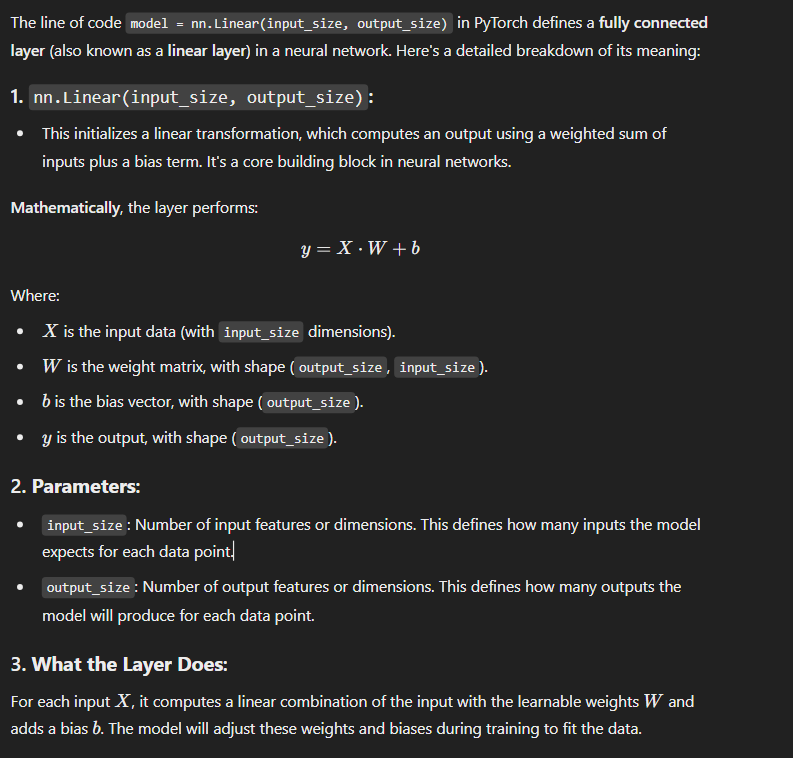

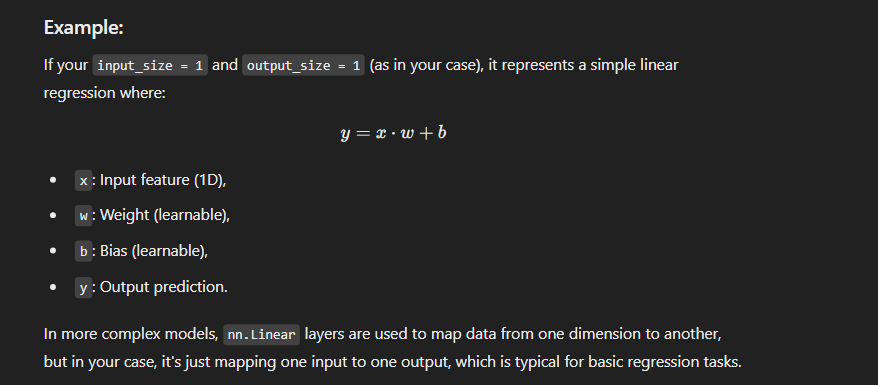

In [36]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

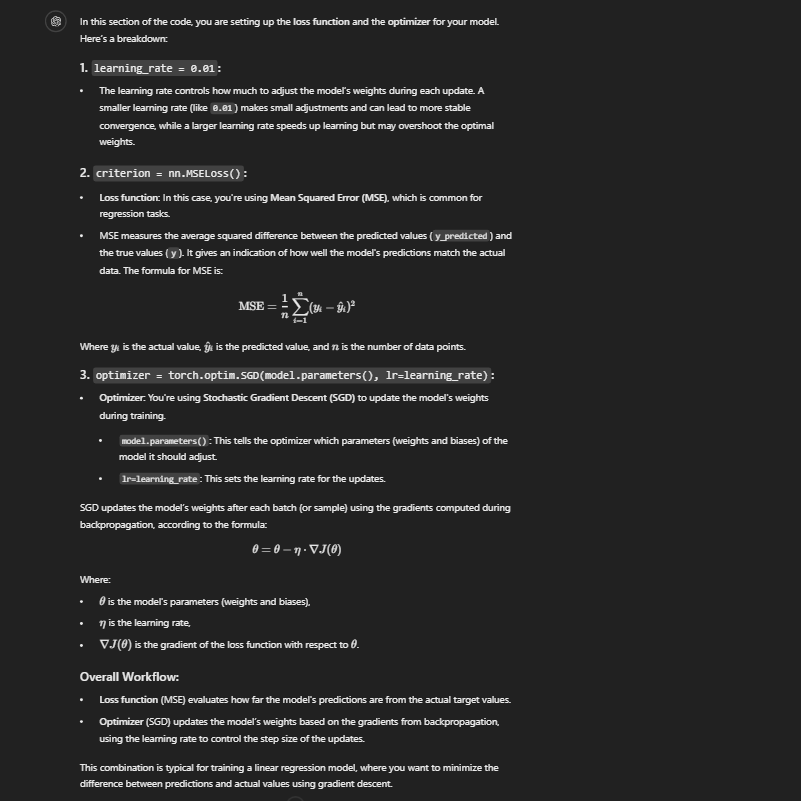

In [37]:
# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

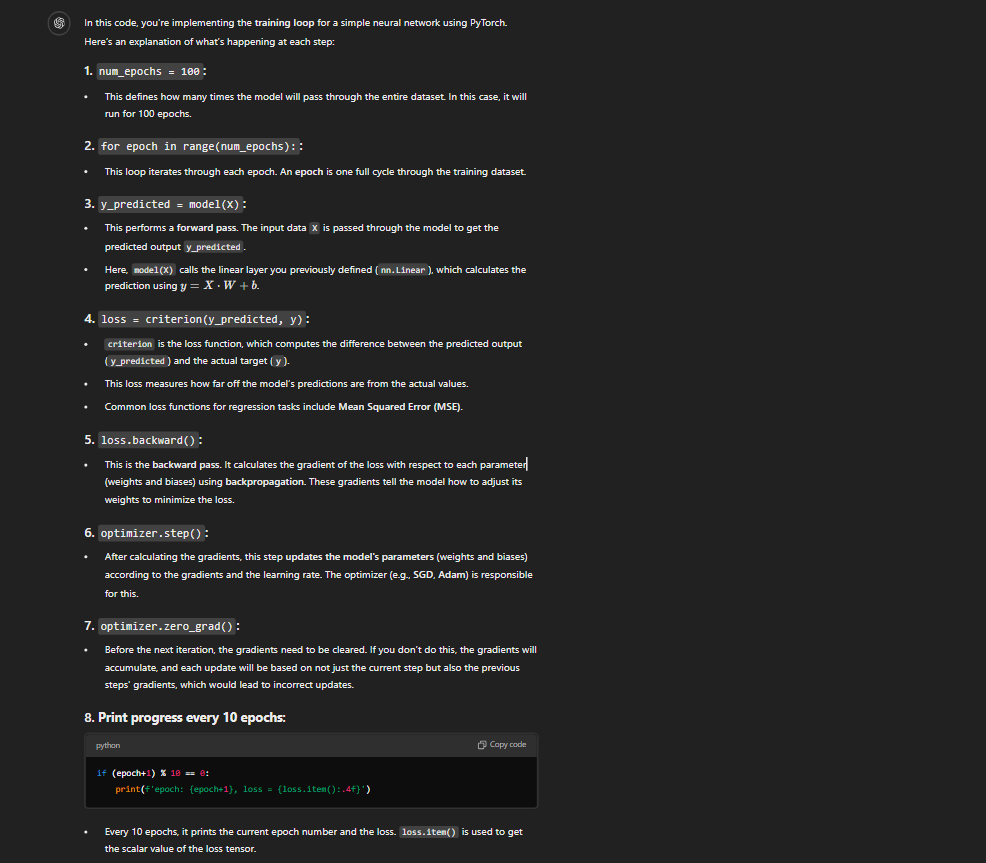

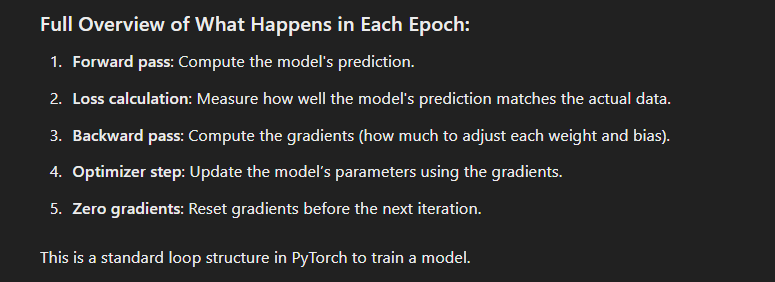

In [38]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


epoch: 10, loss = 4026.7463
epoch: 20, loss = 2838.1074
epoch: 30, loss = 2027.9446
epoch: 40, loss = 1475.6271
epoch: 50, loss = 1099.0122
epoch: 60, loss = 842.1526
epoch: 70, loss = 666.9331
epoch: 80, loss = 547.3814
epoch: 90, loss = 465.7956
epoch: 100, loss = 410.1086


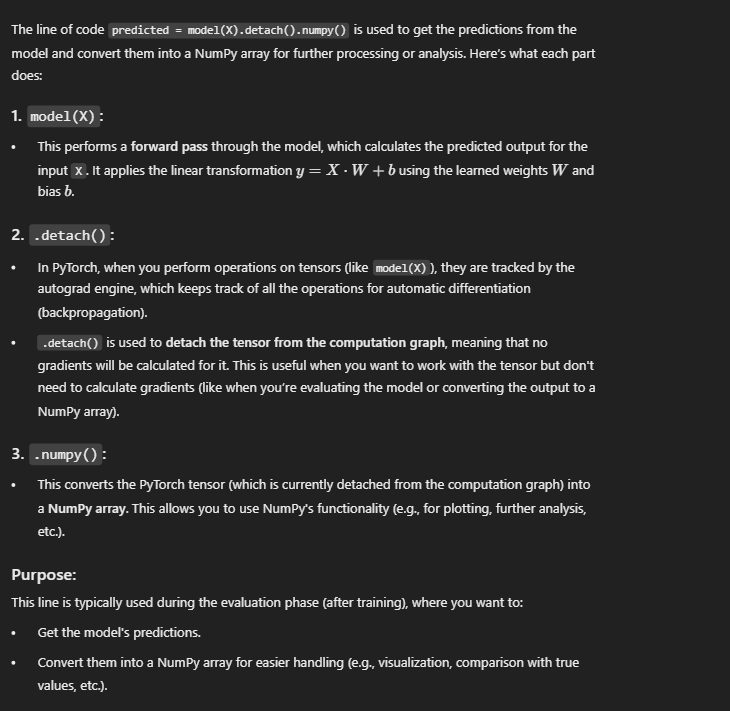

In [39]:
# Plot
predicted = model(X).detach().numpy()
print (predicted)

[[ -85.73922   ]
 [  22.872746  ]
 [  61.361298  ]
 [   2.654827  ]
 [   3.426585  ]
 [   3.4647157 ]
 [  46.57833   ]
 [  51.609882  ]
 [ -72.72589   ]
 [  11.822906  ]
 [ -41.027225  ]
 [ -70.745964  ]
 [-100.89022   ]
 [  -5.2629395 ]
 [ 158.60487   ]
 [ -46.430202  ]
 [  99.206116  ]
 [  -7.9924626 ]
 [  19.55664   ]
 [ -59.982956  ]
 [ -18.999277  ]
 [ -23.566679  ]
 [ -73.55768   ]
 [  38.60616   ]
 [-151.7008    ]
 [ -38.469883  ]
 [  35.020027  ]
 [ 129.58429   ]
 [   3.3070545 ]
 [  33.792976  ]
 [  19.345505  ]
 [ -98.22904   ]
 [ 108.49532   ]
 [  13.733596  ]
 [ -26.368975  ]
 [  56.003117  ]
 [ -72.96091   ]
 [ -10.836245  ]
 [ -61.095284  ]
 [  12.413023  ]
 [  77.16322   ]
 [ 127.519005  ]
 [ -86.602165  ]
 [  -3.1269841 ]
 [  74.746956  ]
 [ -92.6448    ]
 [   1.5789278 ]
 [ -49.399822  ]
 [   2.7583039 ]
 [ -21.755651  ]
 [ -41.252083  ]
 [  10.484833  ]
 [ -76.88874   ]
 [ -41.023247  ]
 [  58.81452   ]
 [-117.26688   ]
 [  32.304417  ]
 [  81.62424   ]
 [  44.677845 

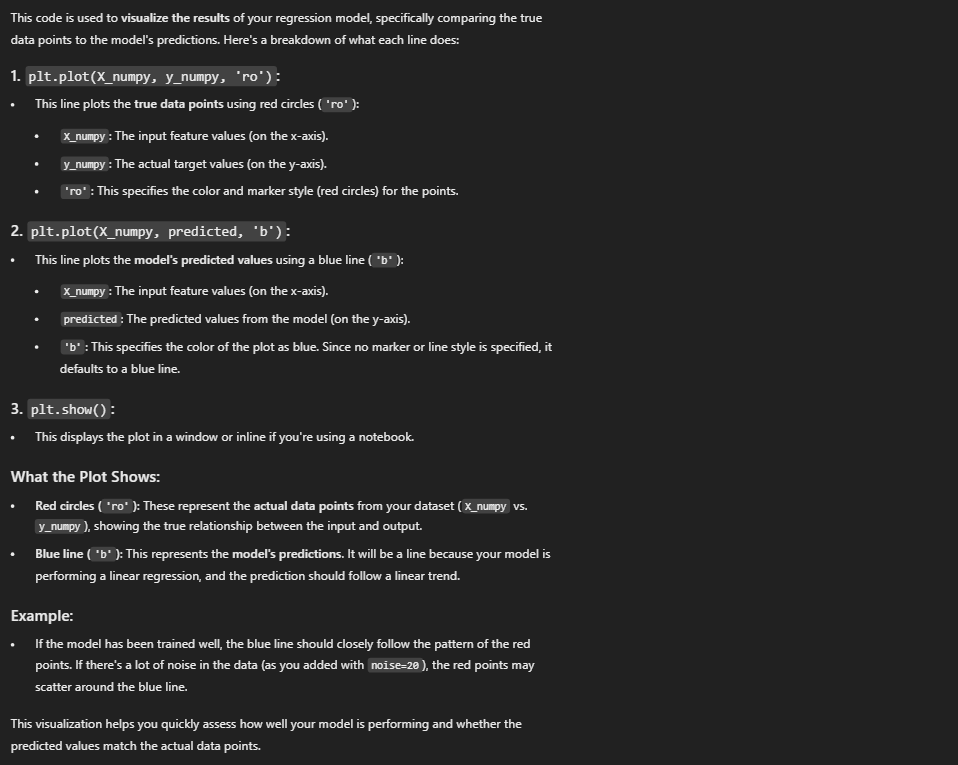

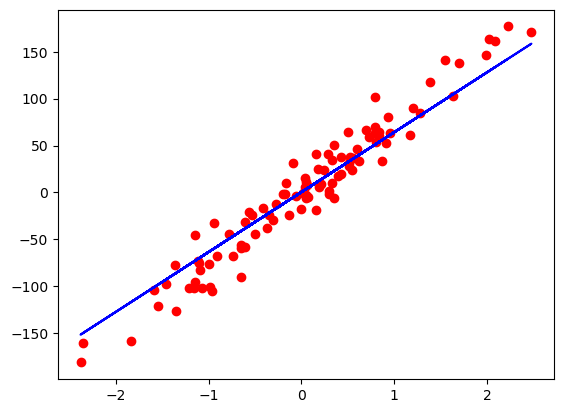

In [40]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Example :

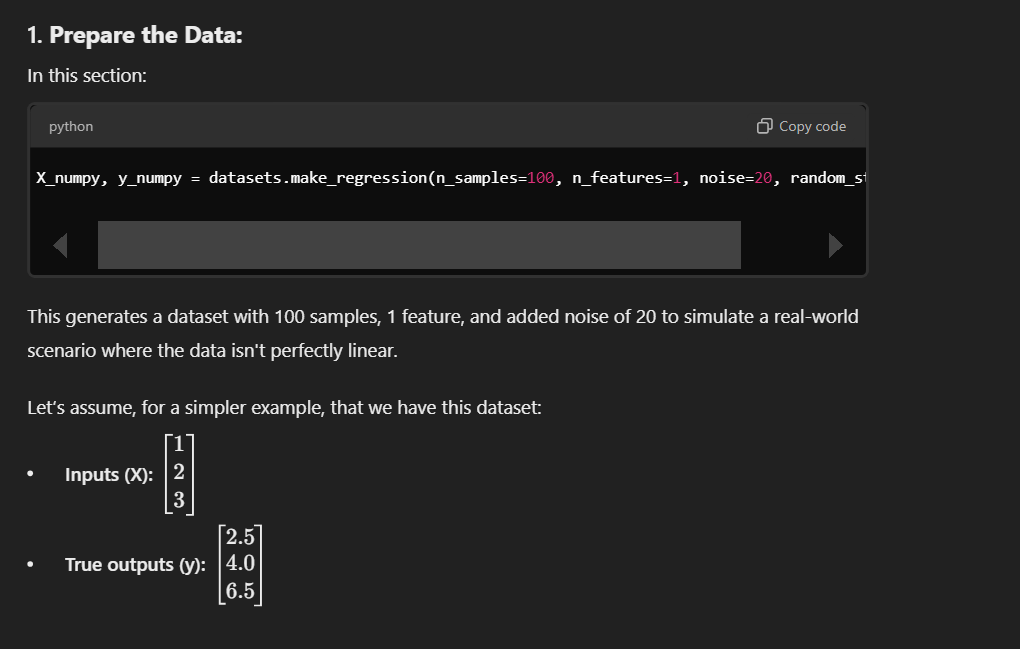

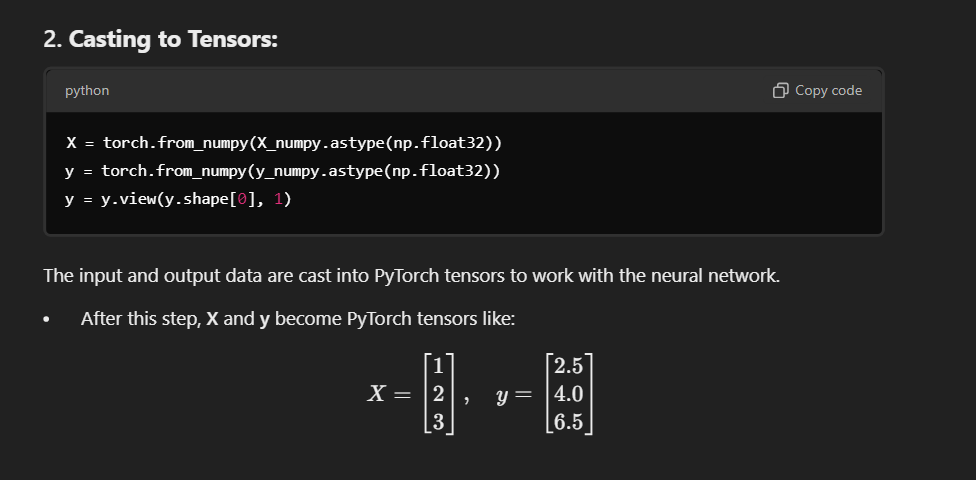

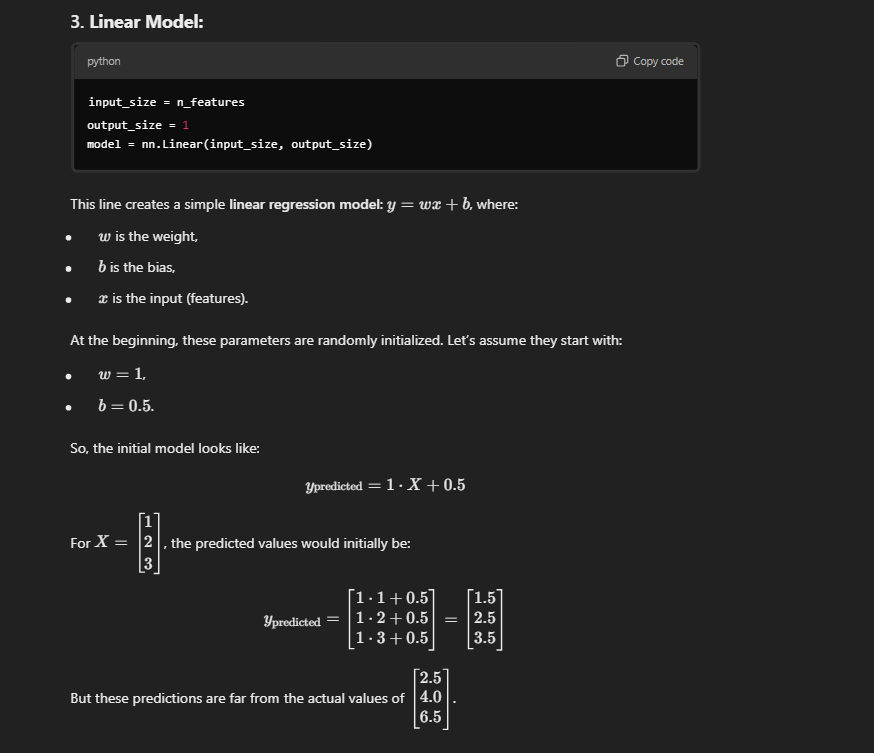

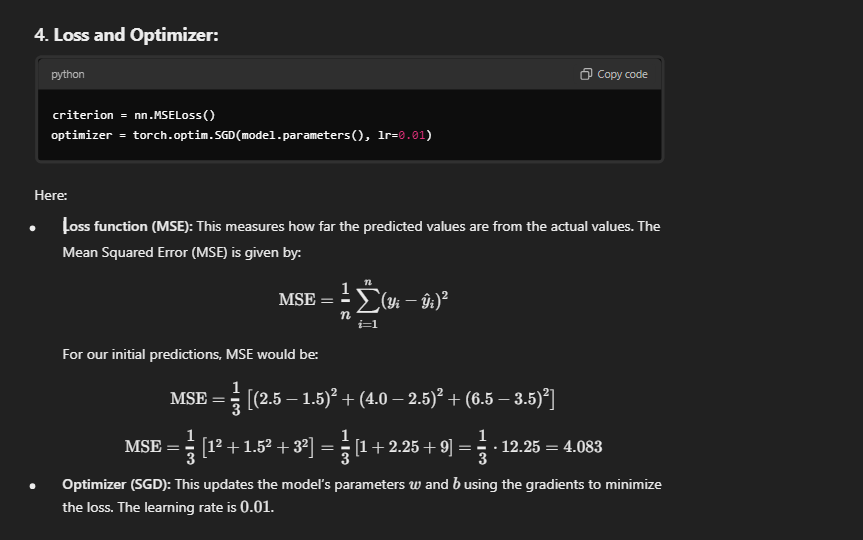

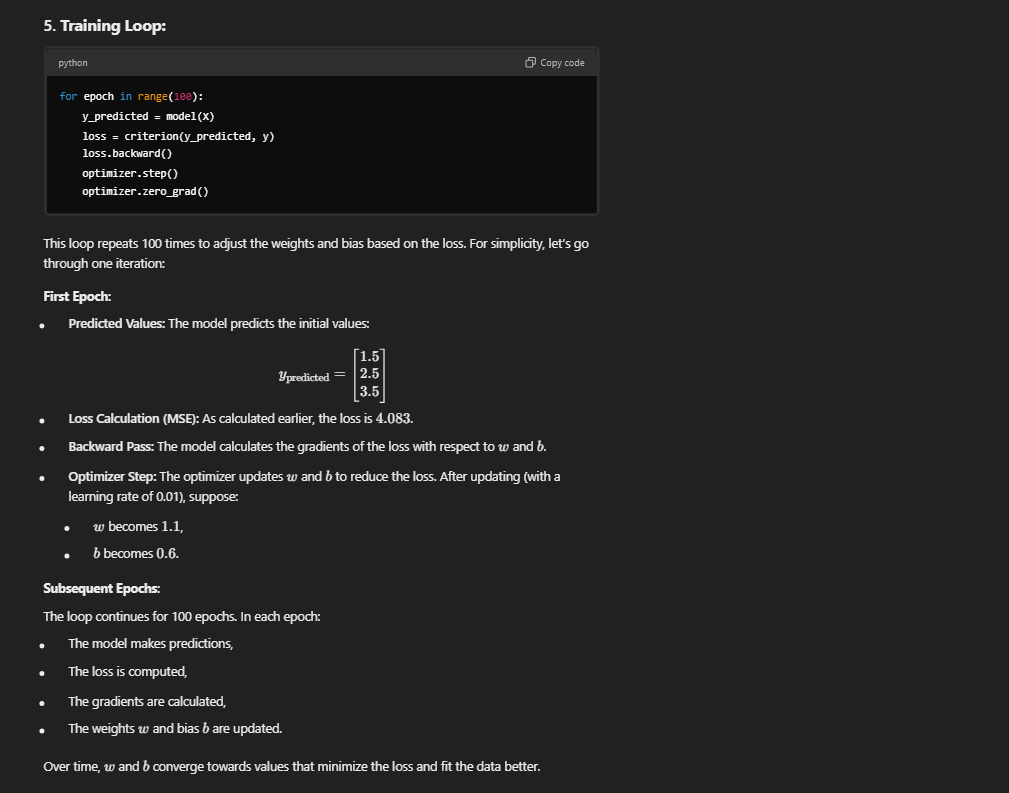

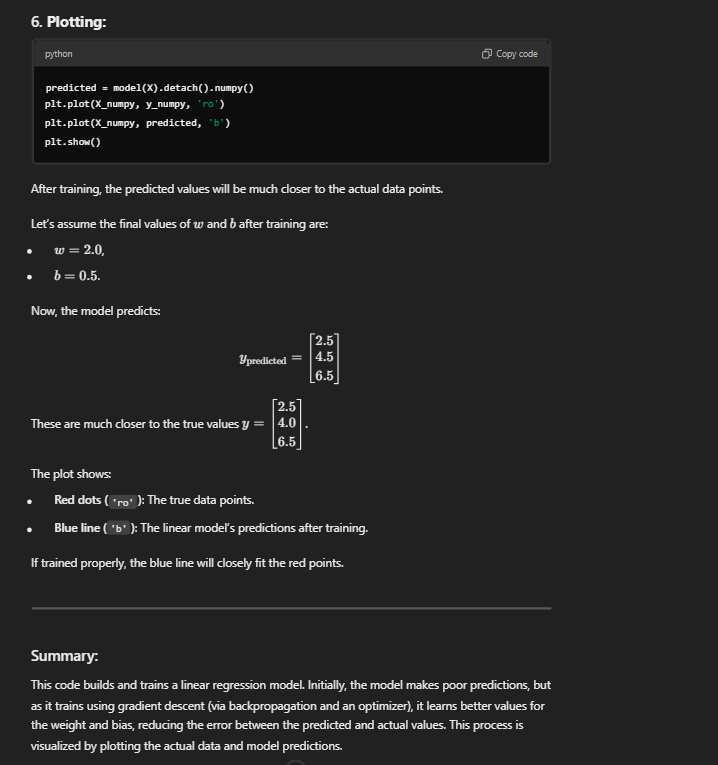